In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HancModel import HANCModelClass

In [2]:
model = HANCModelClass(name='baseline') # create an instance of the model

In [3]:
model.info()

settings:
 par.py_hh = False
 par.py_block = True
 par.full_z_trans = False
 par.T = 500

households:
 grids_hh: [a]
 pols_hh: [a]
 inputs_hh: [r,w_low,w_high,phi_low,phi_high]
 inputs_hh_z: []
 outputs_hh: [a,c]
 intertemps_hh: [vbeg_a]

aggregate:
 shocks: [Gamma,phi_low,phi_high]
 unknowns: [K,L_low,L_high]
 targets: [clearing_A,clearing_L_low,clearing_L_high]

blocks (inputs -> outputs):
 production_firm: [Gamma,K,L_low,L_high,phi_low,phi_high] -> [rK,w_low,w_high,Y]
 mutual_fund: [K,rK] -> [A,r]
 hh: [phi_high,phi_low,r,w_high,w_low] -> [A_hh,C_hh]
 market_clearing: [A,A_hh,L_low,L_high,Y,C_hh,K] -> [L_hh_high,L_hh_low,I,clearing_A,clearing_L_low,clearing_L_high,clearing_Y]


production_firm: [Gamma,K,L_low,L_high,phi_low,phi_high] -> [rK,w_low,w_high,Y]
mutual_fund: [K,rK] -> [A,r]
hh: [phi_high,phi_low,r,w_high,w_low] -> [A_hh,C_hh]
market_clearing: [A,A_hh,L_low,L_high,Y,C_hh,K] -> [L_hh_high,L_hh_low,I,clearing_A,clearing_L_low,clearing_L_high,clearing_Y]


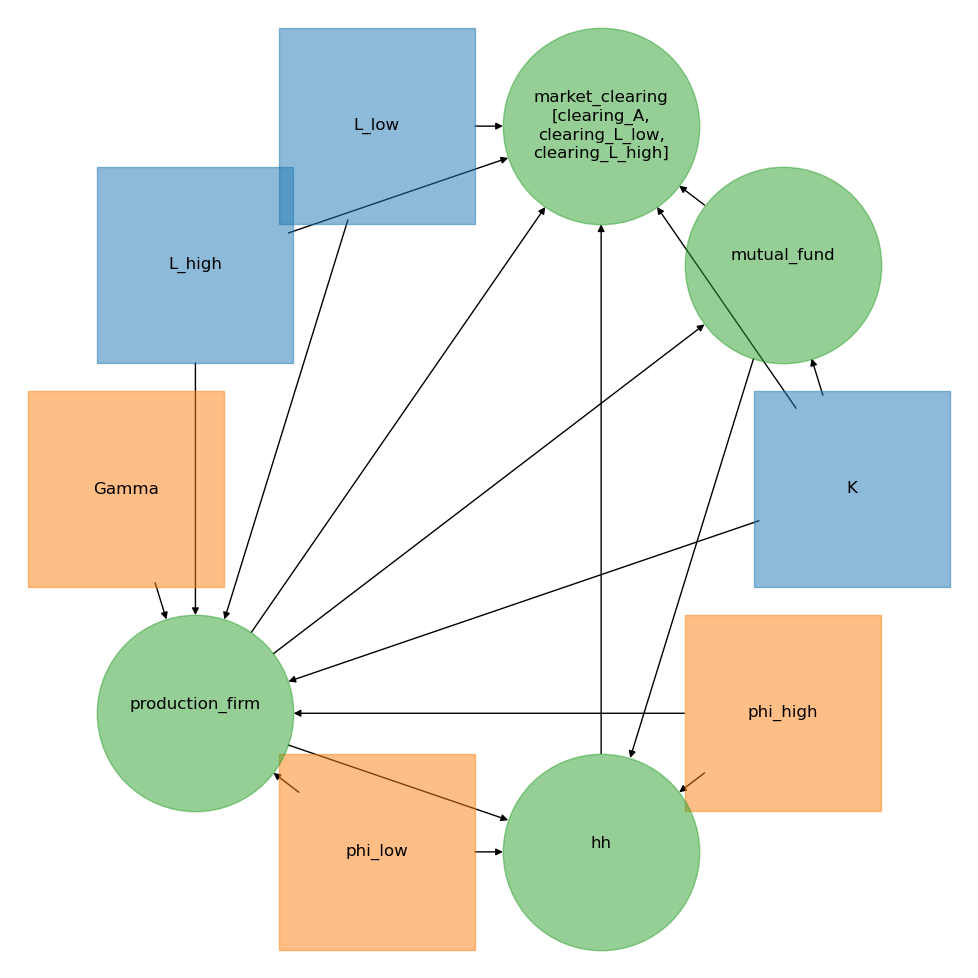

In [4]:
model.info(only_blocks=True)
model.draw_DAG(figsize=(10,10))

In [5]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [6]:
# Calibration parameters
ss.phi_high = 2.0
ss.phi_low = 1.0
# Some guesses for the steady state
ss.r = 0.05
ss.w_high = 1.5
ss.w_low = 1.0
ss.L_high = 1.0
ss.L_low = 0.5

In [7]:
model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 5.9 secs [138 iterations]
household problem in ss simulated in 4.8 secs [86 iterations]


In [8]:
model.find_ss(do_print=True)

### step 1: broad search ###

guess ss.K = 0.1000
implied ss.r = 1.1123
implied ss.w_low = 0.1616
implied ss.w_high = 0.1616
solve_hh_ss(), too many iterations
clearing_A =          nan

guess ss.K = 0.6211
implied ss.r = 0.2767
implied ss.w_low = 0.3119
implied ss.w_high = 0.3119
household problem in ss solved in 0.3 secs [340 iterations]
household problem in ss simulated in 0.0 secs [117 iterations]
implied ss.A_hh = 535.7412
clearing_A = -535.12016392

guess ss.K = 1.1421
implied ss.r = 0.1551
implied ss.w_low = 0.3884
implied ss.w_high = 0.3884
household problem in ss solved in 0.7 secs [796 iterations]
household problem in ss simulated in 0.3 secs [947 iterations]
implied ss.A_hh = 507.2710
clearing_A = -506.12888907

guess ss.K = 1.6632
implied ss.r = 0.1005
implied ss.w_low = 0.4447
implied ss.w_high = 0.4447
household problem in ss solved in 0.8 secs [688 iterations]
household problem in ss simulated in 0.1 secs [467 iterations]
implied ss.A_hh = 0.5047
clearing_A =   1.1584941

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 1.2 secs
household problem simulated along transition in 1.5 secs



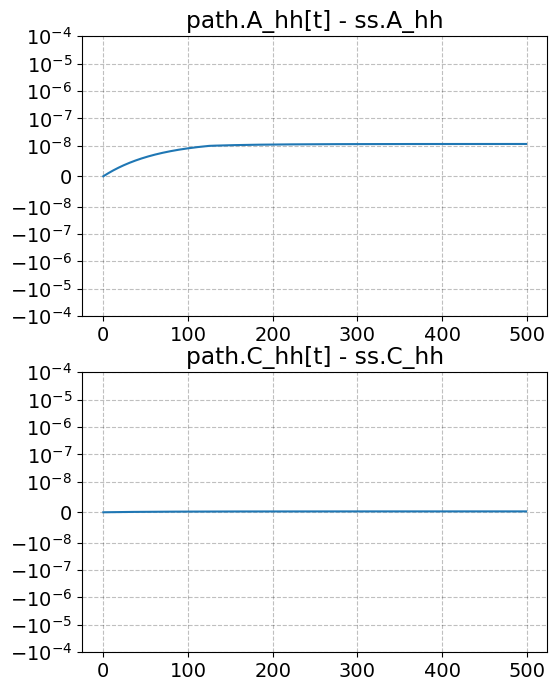

In [9]:
model.test_hh_path()

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 125 250 375 [computed in 2.0 secs]
finding Jacobian wrt. phi_high       : 0 125 250 375 [computed in 2.4 secs]
finding Jacobian wrt. phi_low        : 0 125 250 375 [computed in 2.3 secs]
finding Jacobian wrt. r              : 0 125 250 375 [computed in 2.0 secs]
finding Jacobian wrt. w_high         : 0 125 250 375 [computed in 2.0 secs]
finding Jacobian wrt. w_low          : 0 125 250 375 [computed in 2.2 secs]
household Jacobian computed in 13.1 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for phi_high        in 1.3 secs
curly_Y and curly_D calculated for phi_low         in 0.9 secs
curly_Y and curly_D calculated for r               in 0.9 secs
curly_Y and curly_D calculated for w_high          in 0.9 secs
curly_Y and curly_D calculated for w_low           in 0.9 secs
curly_E calculated in 2.6 secs
buili

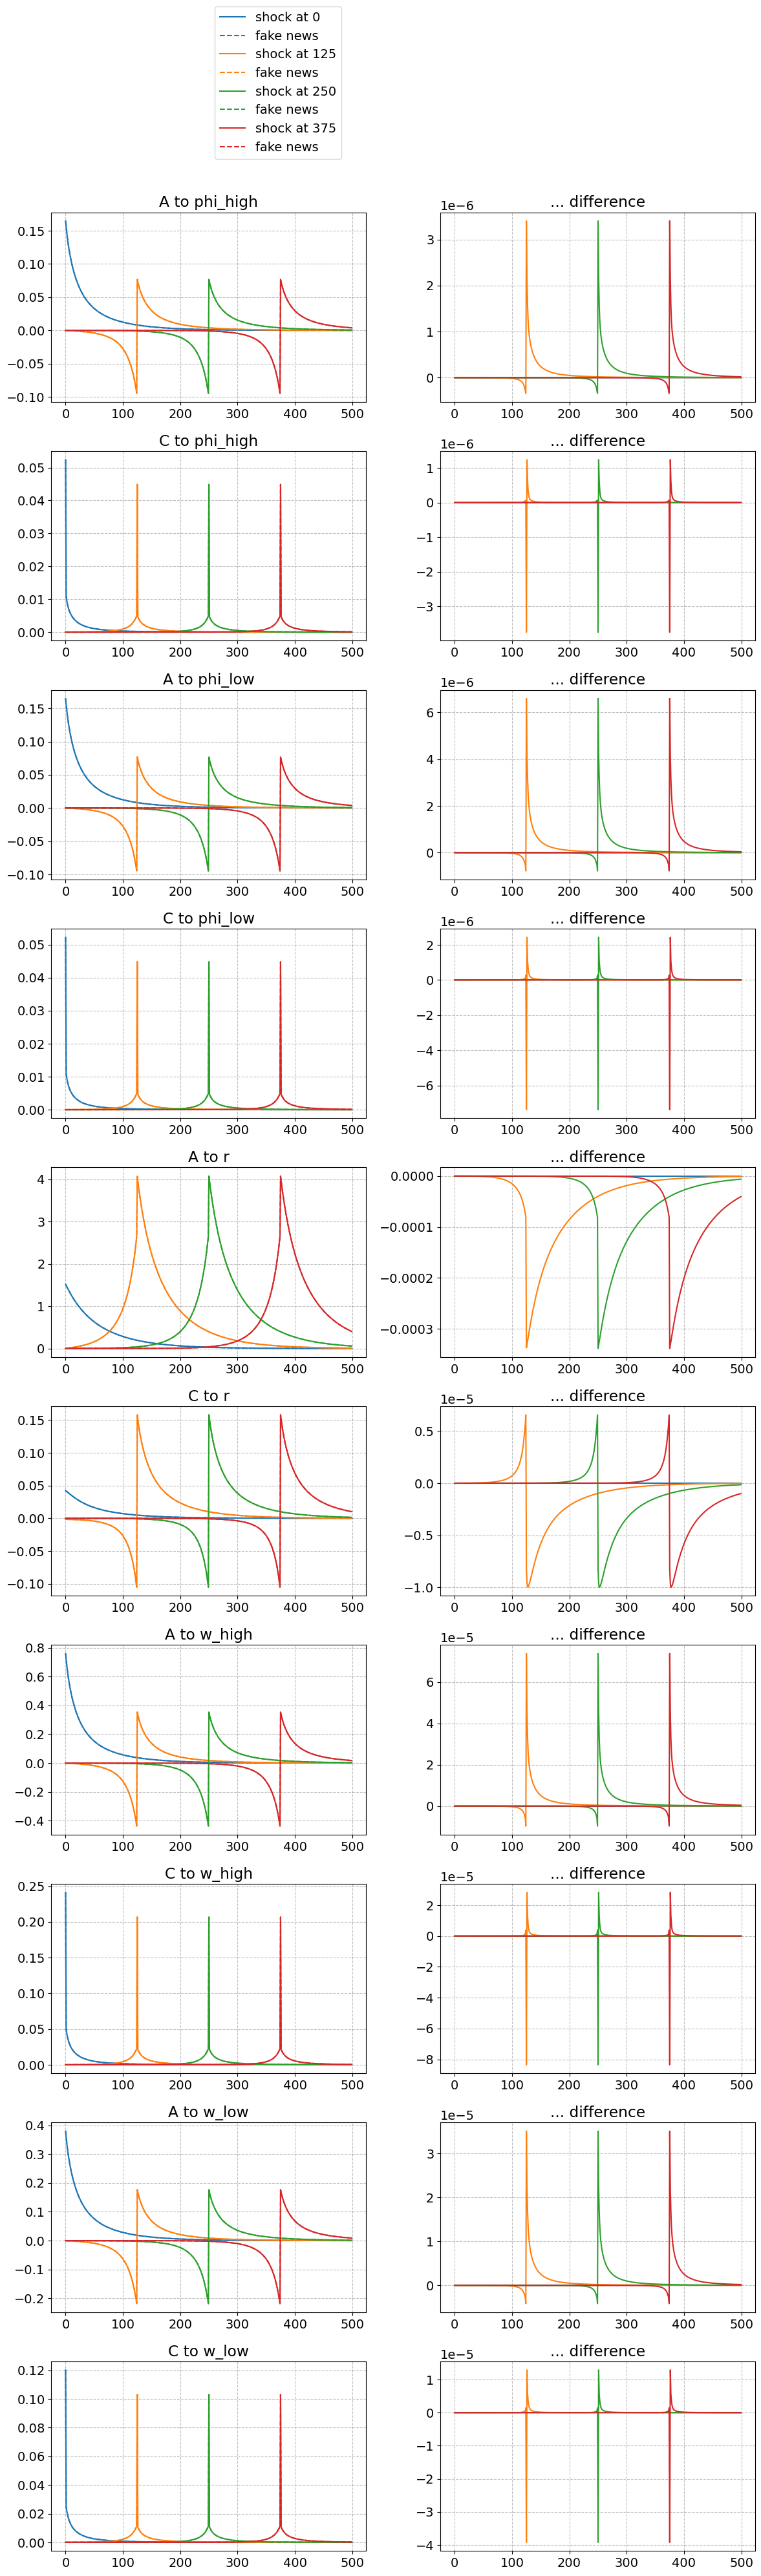

In [10]:
model.test_jacs()

In [11]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for phi_high        in 1.6 secs
curly_Y and curly_D calculated for phi_low         in 1.6 secs
curly_Y and curly_D calculated for r               in 1.7 secs
curly_Y and curly_D calculated for w_high          in 1.5 secs
curly_Y and curly_D calculated for w_low           in 1.1 secs
curly_E calculated in 0.3 secs
builiding blocks combined in 0.7 secs
household Jacobian computed in 8.5 secs

full Jacobians:
full Jacobian to unknowns computed in 1.1 secs [in evaluate_blocks(): 0.6 secs]
full Jacobian to shocks computed in 1.2 secs [in evaluate_blocks(): 0.6 secs]


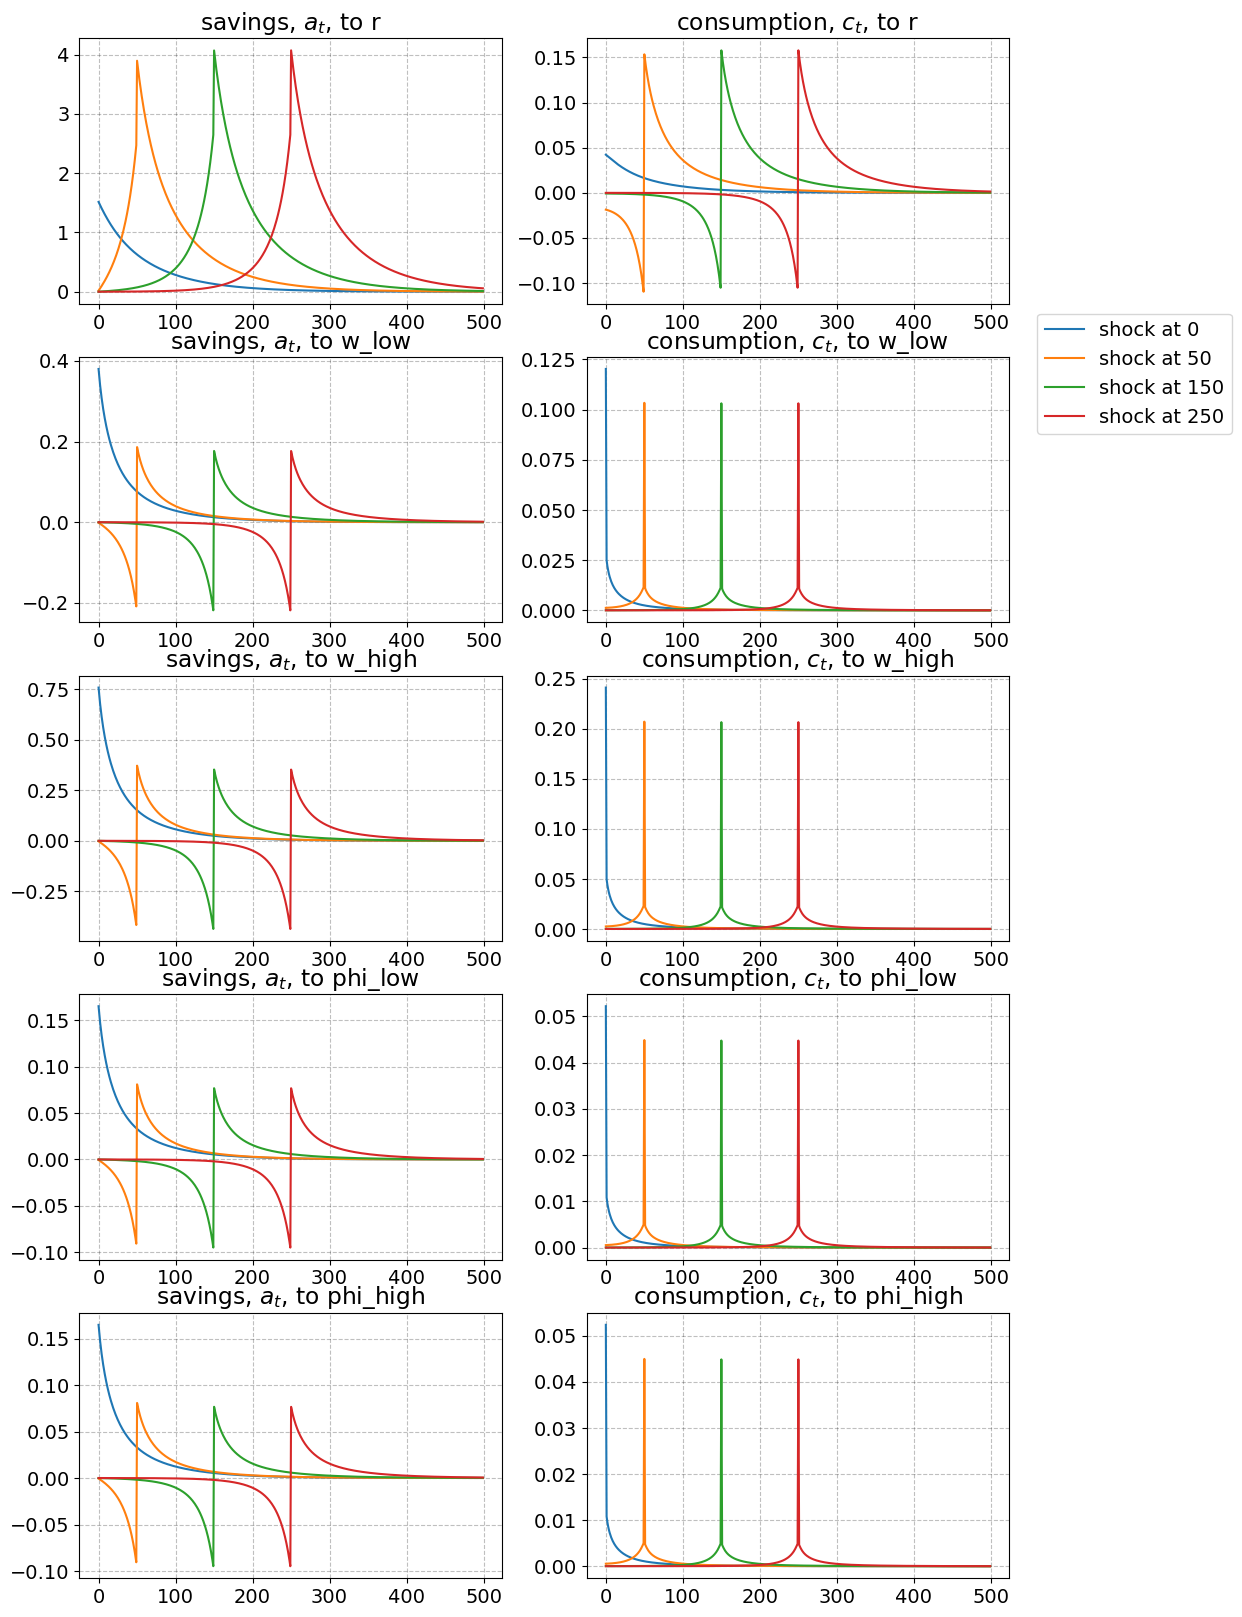

In [12]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
    if i == 1:
        ax.legend(frameon=True,bbox_to_anchor=(2.75,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

In [13]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Gamma          : 1.0000
K              : 1.5570
L_low          : 0.6667
L_high         : 0.6667
rK             : 0.2092
w_low          : 0.4343
w_high         : 0.4343
Y              : 0.9047
phi_low        : 1.0000
phi_high       : 2.0000
A              : 1.5570
r              : 0.1092
A_hh           : 1.5570
C_hh           : 0.6657
L_hh_high      : 3.9873
L_hh_low       : 1.9936
I              : 0.1557
clearing_A     : 0.0000
clearing_L_low : -1.3270
clearing_L_high: -3.3206
clearing_Y     : 0.0833


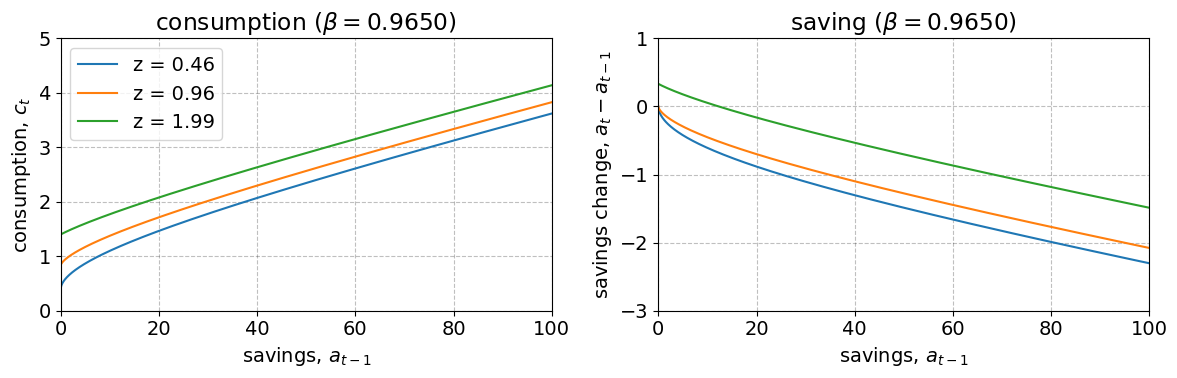

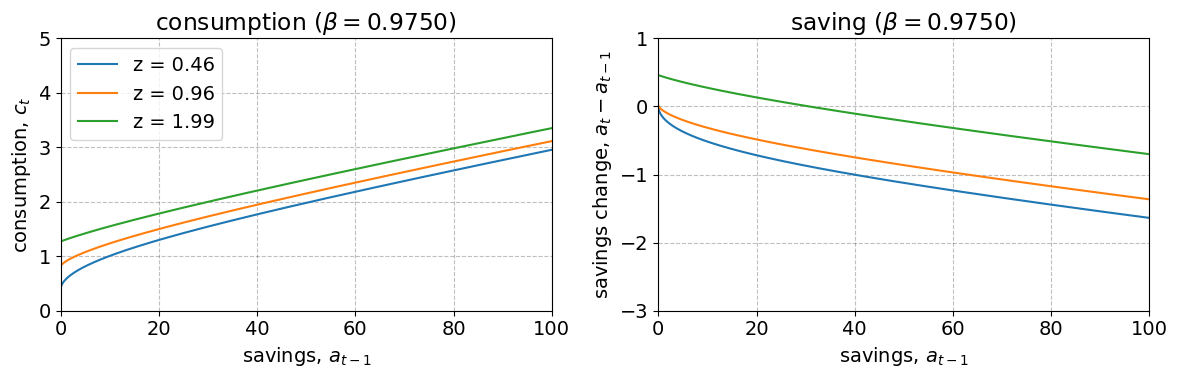

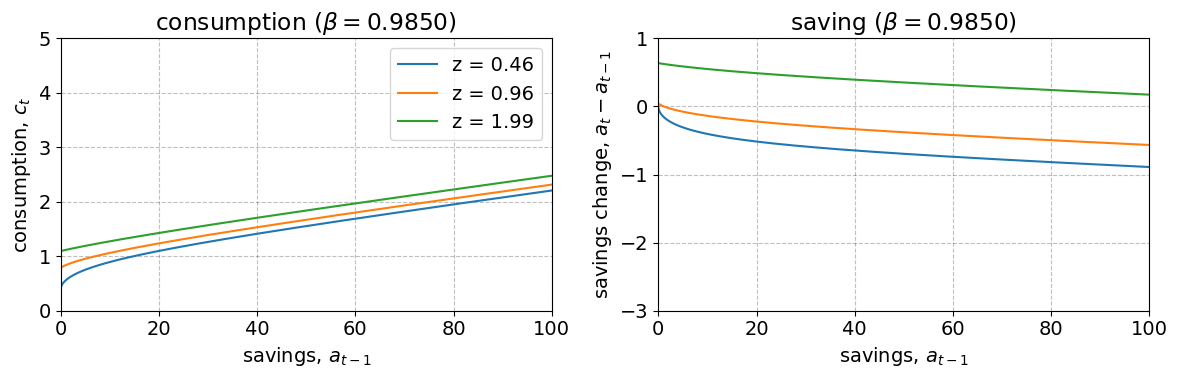

In [14]:
for i_beta,beta in enumerate(par.beta_grid[:3]):
    
    fig = plt.figure(figsize=(12,4),dpi=100)

    I = par.a_grid < 500

    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}$)')

    for i_z,z in enumerate(par.z_grid):
        if i_z%3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I],ss.c[i_beta,i_z,I],label=f'z = {z:.2f}')

    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\beta = {beta:.4f}$)')

    for i_z,z in enumerate(par.z_grid):
        if i_z%3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I],ss.a[i_beta,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,1)

    fig.tight_layout()


In [15]:
model.test_path()

shocks: Gamma phi_low phi_high 
unknowns: K L_low L_high 

blocks.production_firm
 rK               0.0e+00
 w_low            0.0e+00
 w_high           0.0e+00
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                0.0e+00
hh
 A_hh             1.2e-08
 C_hh             2.9e-10
blocks.market_clearing
 L_hh_high            nan
 L_hh_low             nan
 I                    nan
 clearing_A       1.2e-08 [target]
 clearing_L_low       nan [target]
 clearing_L_high      nan [target]
 clearing_Y       2.9e-10


In [16]:
# a. define shock
dphi_high = np.zeros(par.T)
dphi_high[10:21] = 0.1*ss.phi_high + ss.phi_high
shocks = {'dphi_high':dphi_high} # note the 'd' for difference (in absolute terms)

# b. find transition path
model.find_transition_path(do_print=True,shocks=shocks)

finding the transition path:
 it =   0 -> max. abs. error = 3.87e+00
   3.87e+00 in clearing_A
   6.67e-01 in clearing_L_low
   6.67e-01 in clearing_L_high
 it =   1 -> max. abs. error = 7.87e-01
   7.87e-01 in clearing_A
   7.34e-14 in clearing_L_low
   7.34e-14 in clearing_L_high
 it =   2 -> max. abs. error = 3.68e-01
   3.68e-01 in clearing_A
   5.55e-16 in clearing_L_low
   5.55e-16 in clearing_L_high
 it =   3 -> max. abs. error = 5.80e-02
   5.80e-02 in clearing_A
   8.44e-17 in clearing_L_low
   8.44e-17 in clearing_L_high
 it =   4 -> max. abs. error = 1.21e-02
   1.21e-02 in clearing_A
   6.44e-18 in clearing_L_low
   6.44e-18 in clearing_L_high
 it =   5 -> max. abs. error = 6.52e-04
   6.52e-04 in clearing_A
   2.06e-19 in clearing_L_low
   2.06e-19 in clearing_L_high
 it =   6 -> max. abs. error = 1.09e-04
   1.09e-04 in clearing_A
   1.09e-19 in clearing_L_low
   1.09e-19 in clearing_L_high
 it =   7 -> max. abs. error = 1.04e-05
   1.04e-05 in clearing_A
   2.92e-21 in c

### shocks ###


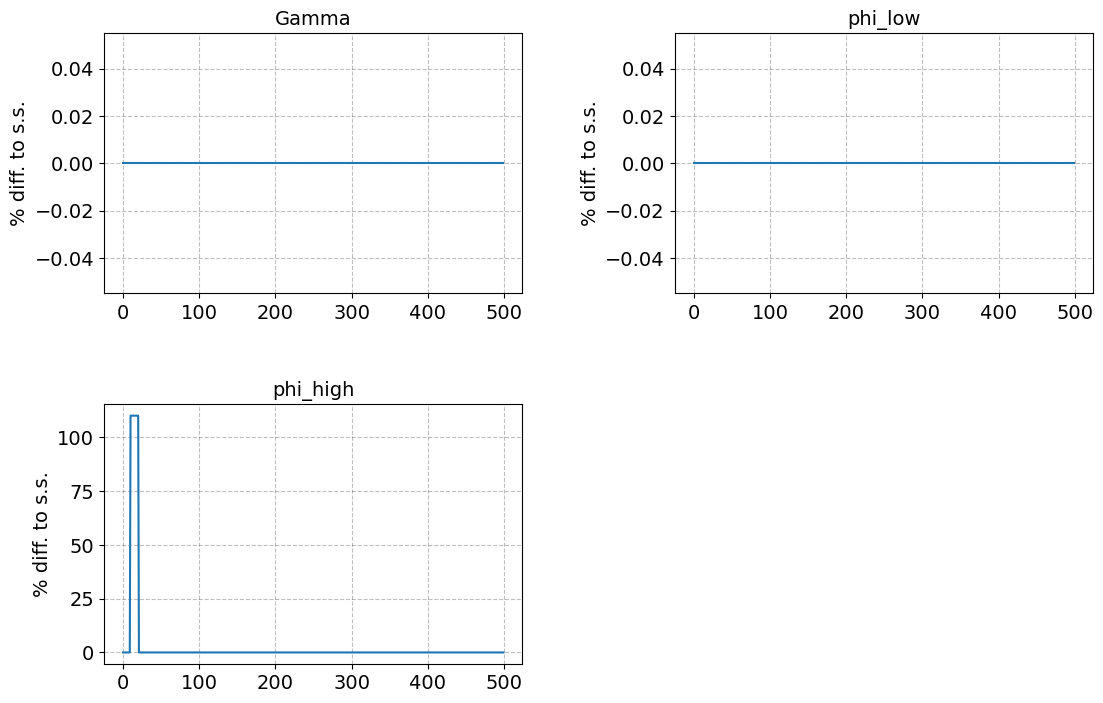


### varnames ###


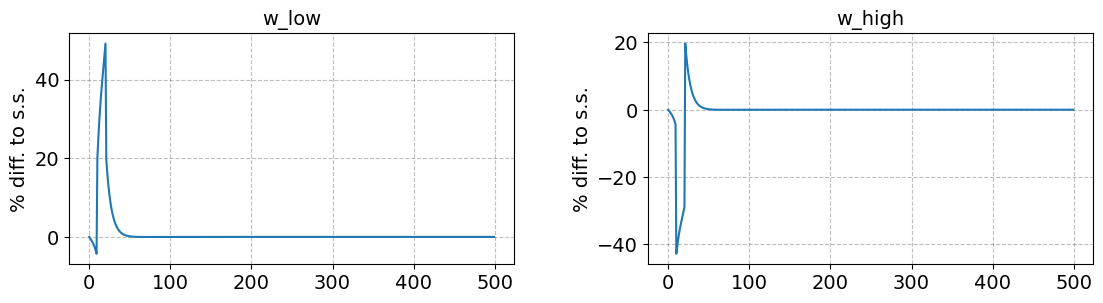


### tagets ###


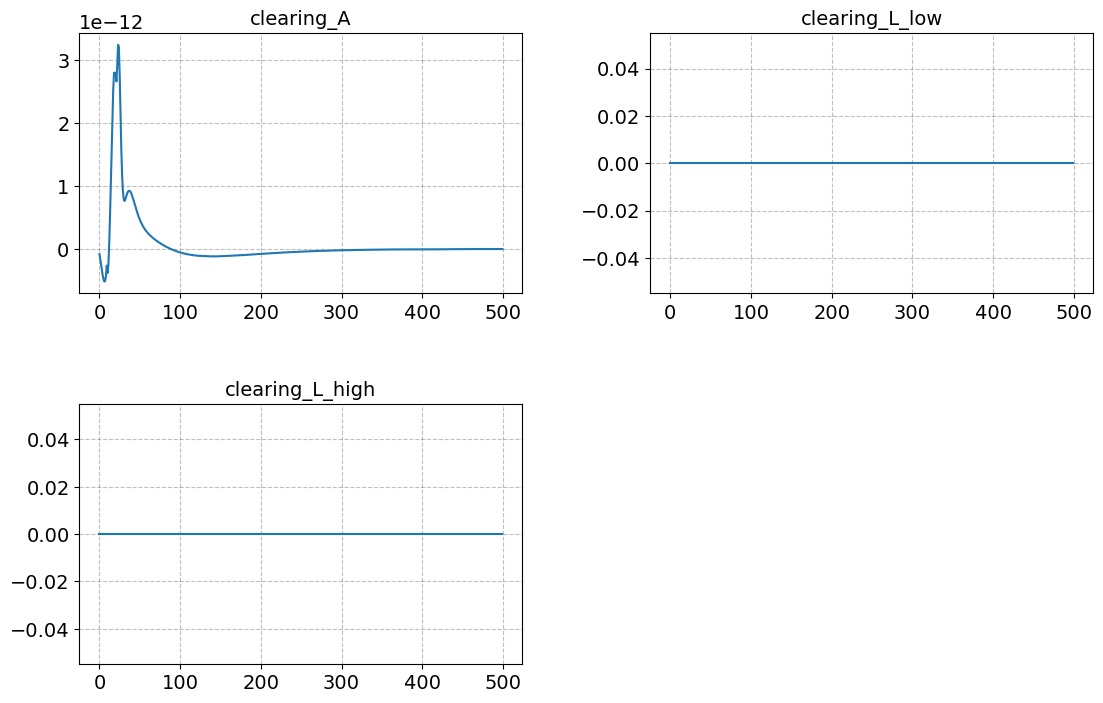

In [17]:
model.show_IRFs(varnames=['w_low','w_high'],ncols=2)